In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [6]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [7]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [8]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    N = y.shape[0]
    e = y - tx.dot(w)
    
    # MSE
    # l = 1/(2*N) * e.dot(e)
    
    # MAE
    l = np.abs(e).sum() / N
    
    return l

In [9]:
w = np.array([1, 2])
l = compute_loss(y, tx, w)

In [10]:
print(l)

72.29392200210518


# 2 Grid Search

Fill in the function `grid_search()` below:

In [11]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    #raise NotImplementedError
    
    for i in range(len(w0)): 
        for j in range(len(w1)):    
            w = np.array([w0[i], w1[j]])
            losses[i,j] = compute_loss(y, tx, w)
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.5885150157040915, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


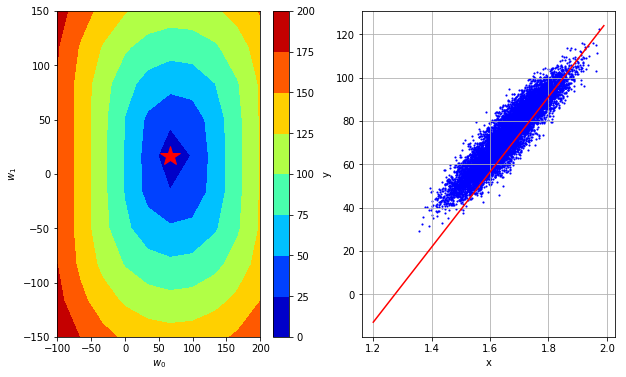

In [12]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [13]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient
    # ***************************************************
    N = y.shape[0]
    e = y - tx.dot(w)
    
    # gradient for MSE
    #return -1/N * (tx.T.dot(e))
    
    # gradient for MAE
    return -1/N * (tx.T @ np.sign(e))

Please fill in the functions `gradient_descent` below:

In [14]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
        #update w by gradient
        w = w - gamma * gradient

        
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [15]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))


Gradient Descent(0/99): loss=73.29392200210518, w0=0, w1=0
Gradient Descent(1/99): loss=72.29392200210518, w0=1.0, w1=-6.59383658785373e-16
Gradient Descent(2/99): loss=71.29392200210518, w0=2.0, w1=-1.318767317570746e-15
Gradient Descent(3/99): loss=70.29392200210518, w0=3.0, w1=-1.978150976356119e-15
Gradient Descent(4/99): loss=69.29392200210518, w0=4.0, w1=-2.637534635141492e-15
Gradient Descent(5/99): loss=68.29392200210518, w0=5.0, w1=-3.296918293926865e-15
Gradient Descent(6/99): loss=67.29392200210518, w0=6.0, w1=-3.956301952712238e-15
Gradient Descent(7/99): loss=66.29392200210518, w0=7.0, w1=-4.615685611497611e-15
Gradient Descent(8/99): loss=65.29392200210518, w0=8.0, w1=-5.275069270282984e-15
Gradient Descent(9/99): loss=64.29392200210518, w0=9.0, w1=-5.934452929068357e-15
Gradient Descent(10/99): loss=63.29392200210517, w0=10.0, w1=-6.59383658785373e-15
Gradient Descent(11/99): loss=62.29392200210517, w0=11.0, w1=-7.253220246639104e-15
Gradient Descent(12/99): loss=61.2939

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [17]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    N = y.shape[0]
    e = y - tx.dot(w)
    return -1/N * (tx.T.dot(e))


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(y, tx, w)

            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

            #update w by gradient
            w = w - gamma * gradient
    
    return losses, ws

In [18]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=73.29392200210518, w0=0, w1=0
Stochastic Gradient Descent(1/49): loss=67.24107680835786, w0=6.052845193747315, w1=-2.9616096573217434
Stochastic Gradient Descent(2/49): loss=63.531346938123974, w0=9.763964895683245, w1=-7.878716146645614
Stochastic Gradient Descent(3/49): loss=58.58604087297305, w0=14.71316654059978, w1=-7.978143964532091
Stochastic Gradient Descent(4/49): loss=56.46741548751276, w0=16.8970090587433, w1=-11.90618208506712
Stochastic Gradient Descent(5/49): loss=48.76401609491871, w0=24.56621865811019, w1=-7.485348889834313
Stochastic Gradient Descent(6/49): loss=43.80950745718577, w0=29.621982320783804, w1=-7.957755850858739
Stochastic Gradient Descent(7/49): loss=40.829280402154914, w0=32.739597804158166, w1=-8.283625989871977
Stochastic Gradient Descent(8/49): loss=39.17320846586171, w0=34.84406153287782, w1=-10.3787908633141
Stochastic Gradient Descent(9/49): loss=38.59012442274462, w0=35.97691453203864, w1=-12.231277901417984

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [20]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

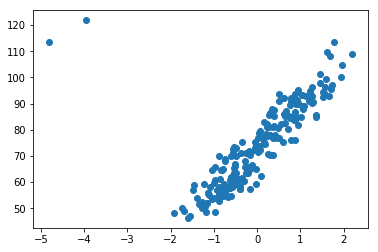

In [21]:
plt.scatter(x, y)

/home/niklas/Misc/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


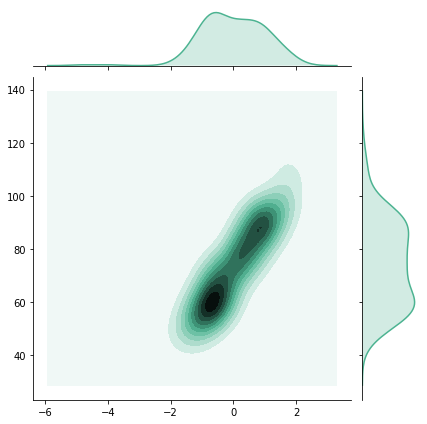

In [22]:
import seaborn as sns

sns.jointplot(x, y, kind='kde',  color="#4CB391")

#### Using GD on outliers

In [27]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))


Gradient Descent(0/99): loss=74.06780585492638, w0=0, w1=0
Gradient Descent(1/99): loss=73.06780585492638, w0=1.0, w1=8.727891896558161e-16
Gradient Descent(2/99): loss=72.06780585492638, w0=2.0, w1=1.7455783793116322e-15
Gradient Descent(3/99): loss=71.06780585492638, w0=3.0, w1=2.6183675689674486e-15
Gradient Descent(4/99): loss=70.06780585492638, w0=4.0, w1=3.4911567586232645e-15
Gradient Descent(5/99): loss=69.06780585492638, w0=5.0, w1=4.36394594827908e-15
Gradient Descent(6/99): loss=68.06780585492638, w0=6.0, w1=5.236735137934896e-15
Gradient Descent(7/99): loss=67.06780585492638, w0=7.0, w1=6.109524327590712e-15
Gradient Descent(8/99): loss=66.06780585492638, w0=8.0, w1=6.982313517246528e-15
Gradient Descent(9/99): loss=65.06780585492638, w0=9.0, w1=7.855102706902344e-15
Gradient Descent(10/99): loss=64.06780585492638, w0=10.0, w1=8.72789189655816e-15
Gradient Descent(11/99): loss=63.067805854926384, w0=11.0, w1=9.600681086213977e-15
Gradient Descent(12/99): loss=62.06780585492

In [28]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

#### Using SGD on outliers

In [32]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=74.06780585492638, w0=0, w1=0
Stochastic Gradient Descent(1/49): loss=66.55404891168205, w0=7.513756943244329, w1=1.1839537746515785
Stochastic Gradient Descent(2/49): loss=61.3616718900466, w0=12.706133964879768, w1=1.0819221124926788
Stochastic Gradient Descent(3/49): loss=54.978808116172104, w0=19.088997738754273, w1=3.3640796432791444
Stochastic Gradient Descent(4/49): loss=47.94288745478838, w0=26.12491840013798, w1=13.997519879424999
Stochastic Gradient Descent(5/49): loss=43.654621836441706, w0=30.413184018484657, w1=7.321333410153266
Stochastic Gradient Descent(6/49): loss=38.25743750070844, w0=35.81036835421792, w1=16.62003659270784
Stochastic Gradient Descent(7/49): loss=34.392698455782984, w0=39.67510739914337, w1=21.34728630333713
Stochastic Gradient Descent(8/49): loss=30.678073490703007, w0=43.38973236422335, w1=20.373705498910653
Stochastic Gradient Descent(9/49): loss=27.790509381645297, w0=46.277296473281055, w1=21.20877621038444

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function